In [ ]:
!pip install yfinance

In [ ]:
# --- Phase 1: Data Acquisition (PYPL) ---

import yfinance as yf
import pandas as pd
from datetime import date, timedelta

In [ ]:
# 1. Define Scope
ticker = 'PYPL'
end_date = date.today()
# Calculate start date as 5 years ago from today
start_date = end_date - timedelta(days=5 * 365)

print(f"Fetching data for: {ticker}")
print(f"Timeframe: {start_date} to {end_date}")
print("---")

Fetching data for: PYPL
Timeframe: 2020-11-08 to 2025-11-07
---


In [ ]:
# 2. Acquire Data
try:
    # yf.download() returns a pandas DataFrame
    data = yf.download(ticker, start=start_date, end=end_date)

    if data.empty:
        print(f"No data found for ticker {ticker}.")
        print("Please check the ticker symbol or the date range.")
    else:
        # Display the first 5 rows
        print("--- Data Head (First 5 Rows) ---")
        print(data.head())
        print("\n")

        # Display the last 5 rows
        print("--- Data Tail (Last 5 Rows) ---")
        print(data.tail())
        print("\n")

        # 3. Initial Data Inspection (for Phase 1, Step 3)
        # .info() is great for checking data types and, most importantly,
        # for spotting any missing values (NaNs).
        print("--- Data Info (Check for Missing Values) ---")
        data.info()

except Exception as e:
    print(f"An error occurred: {e}")

/tmp/ipython-input-1736179243.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

--- Data Head (First 5 Rows) ---
Price            Close        High         Low        Open    Volume
Ticker            PYPL        PYPL        PYPL        PYPL      PYPL
Date                                                                
2020-11-09  184.720001  196.070007  184.440002  195.740005  18986400
2020-11-10  183.360001  186.710007  178.600006  184.979996  13144300
2020-11-11  192.339996  193.100006  186.399994  187.498001   9151700
2020-11-12  189.100006  194.899994  188.429993  193.949997   7096100
2020-11-13  188.619995  191.729996  186.850006  191.106995   6017200


--- Data Tail (Last 5 Rows) ---
Price           Close       High        Low       Open    Volume
Ticker           PYPL       PYPL       PYPL       PYPL      PYPL
Date                                                            
2025-10-31  69.269997  69.580002  67.620003  68.269997  18370100
2025-11-03  68.339996  70.349998  67.705002  69.525002  14619000
2025-11-04  66.080002  67.289001  65.949997  67.230003  

--- Simplified Columns (Head) ---
Price            Close        High         Low        Open    Volume
Date                                                                
2020-11-09  184.720001  196.070007  184.440002  195.740005  18986400
2020-11-10  183.360001  186.710007  178.600006  184.979996  13144300
2020-11-11  192.339996  193.100006  186.399994  187.498001   9151700
2020-11-12  189.100006  194.899994  188.429993  193.949997   7096100
2020-11-13  188.619995  191.729996  186.850006  191.106995   6017200


--- Generating Close Price Plot ---
Saved plot to pypl_close_price.png


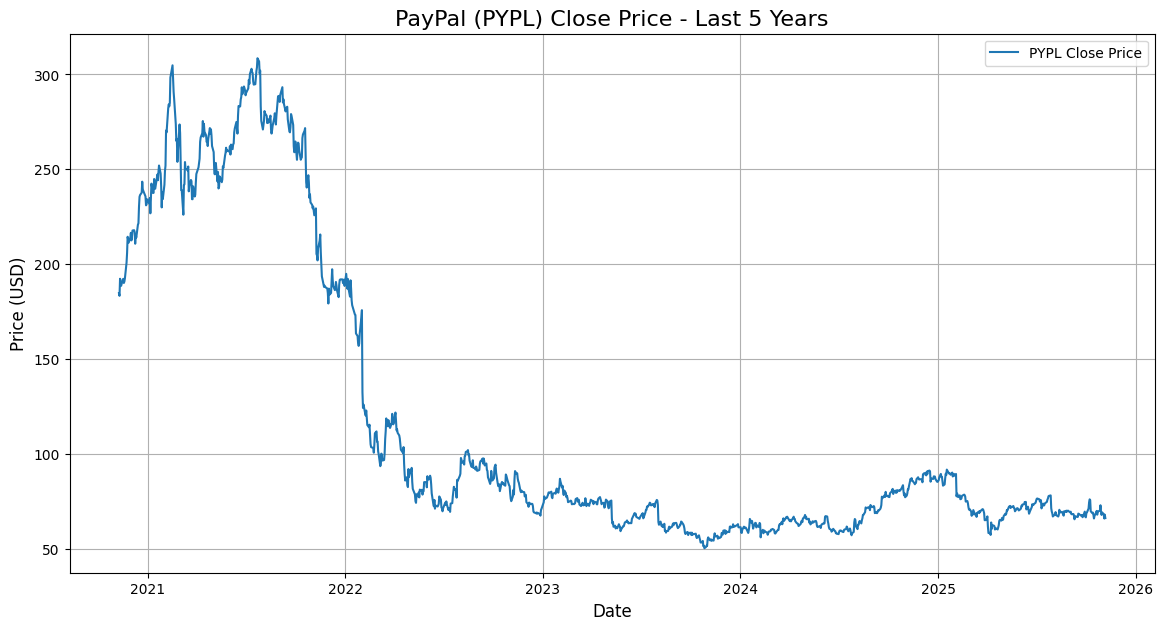

--- Generating Daily Returns Plot & Histogram ---
An error occurred: 'Daily_Return'
Make sure you have run the previous data acquisition cell.


In [ ]:
# --- Phase 1: Data Preprocessing & Phase 2: EDA ---

# (This code assumes 'data' is the DataFrame from the previous cell)

import matplotlib.pyplot as plt

# 1. Simplify Column Names (from MultiIndex)
# The columns are like ('Close', 'PYPL'). We just want 'Close'.
# We can drop the 'Ticker' level (level 1) of the columns.
try:
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.droplevel(1)
        print("--- Simplified Columns (Head) ---")
        print(data.head())
        print("\n")
    else:
        print("--- Columns are already simple ---")

    # 2. Select Target Variable
    # Our main target for forecasting is the 'Close' price.
    target_series = data['Close']

    # --- Phase 2: Exploratory Data Analysis (EDA) ---

    # 3. Visualize the Close Price (Phase 2, Step 1)
    # This plot helps us understand the long-term trend.
    print("--- Generating Close Price Plot ---")
    plt.figure(figsize=(14, 7))
    plt.plot(target_series.index, target_series, label='PYPL Close Price')
    plt.title('PayPal (PYPL) Close Price - Last 5 Years', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Save the plot to a file *before* showing it
    plt.savefig('pypl_close_price.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_close_price.png")

    # This will display the plot in your Colab notebook
    plt.show()


    # 4. Visualize Daily Returns (to see volatility)
    # Returns are stationary (they hover around 0), while price is not.
    # We calculate the percentage change from one day to the next.
    print("--- Generating Daily Returns Plot & Histogram ---")
    # We need to drop the first NaN value created by pct_change() for a clean plot
    data_returns = data['Daily_Return'].dropna()

    # Plot the daily returns over time
    plt.figure(figsize=(14, 7))
    plt.plot(data_returns.index, data_returns, label='PYPL Daily Return',
             alpha=0.8, linestyle='-', marker='o', markersize=2)
    plt.title('PayPal (PYPL) Daily Returns - Last 5 Years', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Percent Change', fontsize=12)
    plt.axhline(0, color='red', linestyle='--', linewidth=1) # Add a line at 0
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig('pypl_daily_returns.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_daily_returns.png")

    plt.show()

    # Plot a histogram of the daily returns
    # This shows us the distribution of returns.
    plt.figure(figsize=(10, 6))
    data_returns.hist(bins=100, alpha=0.75, color='blue', edgecolor='black')
    plt.title('Histogram of PYPL Daily Returns')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

    # Save the plot
    plt.savefig('pypl_returns_histogram.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_returns_histogram.png")

    plt.show()


except Exception as e:
    print(f"An error occurred: {e}")
    print("Make sure you have run the previous data acquisition cell.")



In [ ]:
# --- Phase 2: Statistical Analysis (Step 2: Stationarity Test) ---

# We will use the Augmented Dickey-Fuller (ADF) test.
# Null Hypothesis (H0): The time series is non-stationary (it has a unit root).
# Alternative Hypothesis (H1): The time series is stationary.
# We want to REJECT the Null Hypothesis.

# How to interpret the result:
# If p-value <= 0.05: Reject H0 -> The series is STATIONARY.
# If p-value > 0.05:  Fail to reject H0 -> The series is NON-STATIONARY.

from statsmodels.tsa.stattools import adfuller

# (This code assumes 'data' is the DataFrame from the previous steps,
# and 'target_series' is data['Close'])

try:
    print("--- Running ADF Test on Close Price (Non-Stationary) ---")
    # We test the raw 'Close' price first. We expect this to be non-stationary.
    # We must drop any NaN values for the test to run
    adf_test_price = adfuller(target_series.dropna())

    print(f'ADF Statistic: {adf_test_price[0]}')
    print(f'p-value: {adf_test_price[1]}')
    print('Critical Values:')
    for key, value in adf_test_price[4].items():
        print(f'\t{key}: {value}')

    if adf_test_price[1] > 0.05:
        print("\nResult: p-value is > 0.05. We fail to reject H0.")
        print("Conclusion: The Close Price series is NON-STATIONARY (as expected).")
    else:
        print("\nResult: p-value is <= 0.05. We reject H0.")
        print("Conclusion: The Close Price series is STATIONARY (unexpected).")


    print("\n" + "="*50 + "\n")


    print("--- Running ADF Test on Daily Returns (Stationary) ---")
    # Now we test the 'Daily_Return'. We expect this to be stationary.
    # .dropna() is crucial here as the first day's return is NaN
    daily_returns = data['Daily_Return'].dropna()
    adf_test_returns = adfuller(daily_returns)

    print(f'ADF Statistic: {adf_test_returns[0]}')
    print(f'p-value: {adf_test_returns[1]}')
    print('Critical Values:')
    for key, value in adf_test_returns[4].items():
        print(f'\t{key}: {value}')

    if adf_test_returns[1] > 0.05:
        print("\nResult: p-value is > 0.05. We fail to reject H0.")
        print("Conclusion: The Daily Returns series is NON-STATIONARY (unexpected).")
    else:
        print("\nResult: p-value is <= 0.05. We reject H0.")
        print("Conclusion: The Daily Returns series is STATIONARY (as expected).")

except ImportError:
    print("Error: 'statsmodels' library not found.")
    print("Please install it in Colab by running: !pip install statsmodels")
except Exception as e:
    print(f"An error occurred: {e}")


--- Running ADF Test on Close Price (Non-Stationary) ---
ADF Statistic: -0.9542819647650402
p-value: 0.7695717609726888
Critical Values:
	1%: -3.4355796466416777
	5%: -2.863849421064024
	10%: -2.5679995625056926

Result: p-value is > 0.05. We fail to reject H0.
Conclusion: The Close Price series is NON-STATIONARY (as expected).


--- Running ADF Test on Daily Returns (Stationary) ---
An error occurred: 'Daily_Return'


In [ ]:
# --- Phase 2: Statistical Analysis (Step 3: Autocorrelation Plots) ---

# We will plot the ACF and PACF for our STATIONARY series: 'Daily_Return'
# This helps us determine the parameters (p, q) for an ARIMA model.

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# (This code assumes 'data' is the DataFrame from the previous steps)

try:
    # Use the stationary daily returns, dropping the first NaN value
    daily_returns = data['Daily_Return'].dropna()

    print("--- Generating ACF (Autocorrelation) Plot ---")

    # Plot the ACF
    fig_acf, ax_acf = plt.subplots(figsize=(12, 6))
    plot_acf(daily_returns, lags=40, ax=ax_acf, title='Autocorrelation (ACF) - PYPL Daily Returns')
    ax_acf.set_xlabel('Lag')
    ax_acf.set_ylabel('Autocorrelation')

    # Save the plot
    plt.savefig('pypl_acf_plot.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_acf_plot.png")
    plt.show()


    print("\n--- Generating PACF (Partial Autocorrelation) Plot ---")

    # Plot the PACF
    fig_pacf, ax_pacf = plt.subplots(figsize=(12, 6))
    plot_pacf(daily_returns, lags=40, ax=ax_pacf, title='Partial Autocorrelation (PACF) - PYPL Daily Returns', method='ywm')
    ax_pacf.set_xlabel('Lag')
    ax_pacf.set_ylabel('Partial Autocorrelation')

    # Save the plot
    plt.savefig('pypl_pacf_plot.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_pacf_plot.png")
    plt.show()

except ImportError:
    print("Error: 'statsmodels' library not found.")
    print("Please install it in Colab by running: !pip install statsmodels")
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: 'Daily_Return'


In [ ]:
# --- Phase 2: Statistical Analysis (Step 3: Autocorrelation Plots) ---

# We will plot the ACF and PACF for our STATIONARY series: 'Daily_Return'
# This helps us determine the parameters (p, q) for an ARIMA model.

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

try:
    # Use the stationary daily returns, dropping the first NaN value
    daily_returns = data['Daily_Return'].dropna()

    print("--- Generating ACF (Autocorrelation) Plot ---")

    # Plot the ACF
    fig_acf, ax_acf = plt.subplots(figsize=(12, 6))
    plot_acf(daily_returns, lags=40, ax=ax_acf, title='Autocorrelation (ACF) - PYPL Daily Returns')
    ax_acf.set_xlabel('Lag')
    ax_acf.set_ylabel('Autocorrelation')

    # Save the plot
    plt.savefig('pypl_acf_plot.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_acf_plot.png")
    plt.show()


    print("\n--- Generating PACF (Partial Autocorrelation) Plot ---")

    # Plot the PACF
    fig_pacf, ax_pacf = plt.subplots(figsize=(12, 6))
    plot_pacf(daily_returns, lags=40, ax=ax_pacf, title='Partial Autocorrelation (PACF) - PYPL Daily Returns', method='ywm')
    ax_pacf.set_xlabel('Lag')
    ax_pacf.set_ylabel('Partial Autocorrelation')

    # Save the plot
    plt.savefig('pypl_pacf_plot.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_pacf_plot.png")
    plt.show()

except ImportError:
    print("Error: 'statsmodels' library not found.")
    print("Please install it in Colab by running: !pip install statsmodels")
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: 'Daily_Return'


Total data points: 1255
Training data points: 1004
Test data points: 251

--- Model Training ---
Training ARIMA(0, 1, 0) model... (This may take a moment)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1004
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2765.854
Date:                Fri, 07 Nov 2025   AIC                           5533.708
Time:                        09:59:33   BIC                           5538.619
Sample:                             0   HQIC                          5535.575
                               - 1004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        14.5455      0.195     74.629      0.000 

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Saved plot to pypl_baseline_forecast.png


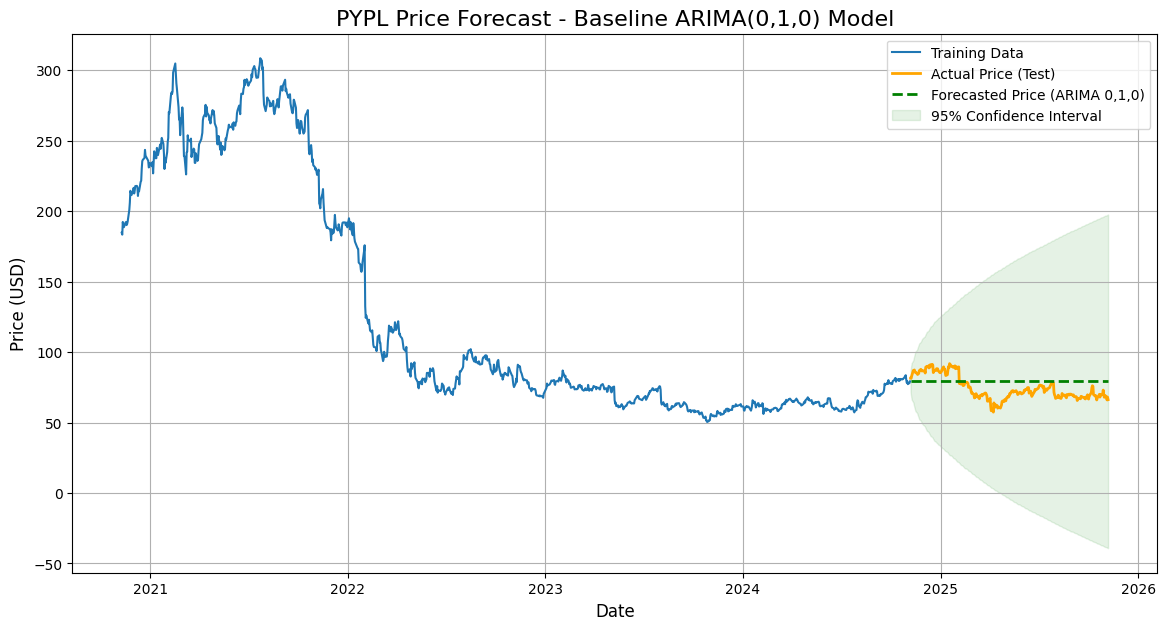

In [ ]:
# --- Phase 3: Model Selection & Training (Baseline Model) ---

# We'll build our baseline model: ARIMA(0, 1, 0), the "Random Walk".
# This model predicts that the next price will be the same as the current price.
# We will fit it on the raw 'Close' price, as the 'd=1' handles differencing.

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# (This code assumes 'data' is the DataFrame from the previous steps)

try:
    # 1. Prepare Data
    # We will use the 'Close' price series
    price_series = data['Close']

    # 2. Split Data into Train (80%) and Test (20%)
    split_point = int(len(price_series) * 0.8)
    train_data = price_series[0:split_point]
    test_data = price_series[split_point:]

    print(f"Total data points: {len(price_series)}")
    print(f"Training data points: {len(train_data)}")
    print(f"Test data points: {len(test_data)}")
    print("\n--- Model Training ---")
    print("Training ARIMA(0, 1, 0) model... (This may take a moment)")

    # 3. Define and Train the ARIMA(0, 1, 0) Model
    # We fit the model on the TRAINING data
    # order=(p, d, q)
    model_order = (0, 1, 0)
    arima_model = ARIMA(train_data, order=model_order)

    # .fit() returns a "results" object
    model_fit = arima_model.fit()

    print(model_fit.summary())
    print("\n--- Model Forecasting ---")

    # 4. Generate Forecasts
    # We want to forecast for the same number of steps as our test set
    num_forecast_steps = len(test_data)

    # get_forecast() predicts the values
    forecast_result = model_fit.get_forecast(steps=num_forecast_steps)

    # Get the predicted mean values
    forecast = forecast_result.predicted_mean
    # Get the confidence intervals (for a nice plot)
    conf_int = forecast_result.conf_int(alpha=0.05) # 95% confidence

    # Set the index of our forecast to match the test data's index
    forecast.index = test_data.index
    conf_int.index = test_data.index

    # 5. Evaluate the Model
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    print(f"\nModel RMSE (Root Mean Squared Error): {rmse:.4f}")

    # For context, let's print the mean of the test data
    print(f"Average 'Close' price in test set: {test_data.mean():.4f}")
    print("RMSE tells us the average error of our prediction in USD.")

    # 6. Plot the Results
    print("\n--- Generating Forecast Plot ---")
    plt.figure(figsize=(14, 7))

    # Plot training data
    plt.plot(train_data.index, train_data, label='Training Data')
    # Plot test data
    plt.plot(test_data.index, test_data, label='Actual Price (Test)',
             color='orange', linewidth=2)
    # Plot forecasted data
    plt.plot(forecast.index, forecast, label='Forecasted Price (ARIMA 0,1,0)',
             color='green', linestyle='--', linewidth=2)

    # Plot confidence interval
    plt.fill_between(conf_int.index,
                     conf_int.iloc[:, 0],
                     conf_int.iloc[:, 1],
                     color='green', alpha=0.1, label='95% Confidence Interval')

    plt.title('PYPL Price Forecast - Baseline ARIMA(0,1,0) Model', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig('pypl_baseline_forecast.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_baseline_forecast.png")

    plt.show()

except ImportError:
    print("Error: 'statsmodels' or 'sklearn' library not found.")
    print("Please install it in Colab by running: !pip install statsmodels scikit-learn")
except Exception as e:
    print(f"An error occurred: {e}")


--- Checking/Installing 'arch' library ---
Installing 'arch' library...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 16.7 MB/s eta 0:00:00
--- 'arch' library installed successfully ---

--- Running GARCH analysis ---
Training GARCH(1,1) model on 1003 data points...

--- GARCH(1,1) Model Results ---
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                 Daily_Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2311.87
Distribution:      Standardized Student's t   AIC:                           4633.74
Method:                  Maximum Likelihood   BIC:                           4658.30
                                              No. Observations:                 1003
Date:                      Fri, Nov 07 2025   Df Residuals:                     1002
Time: 

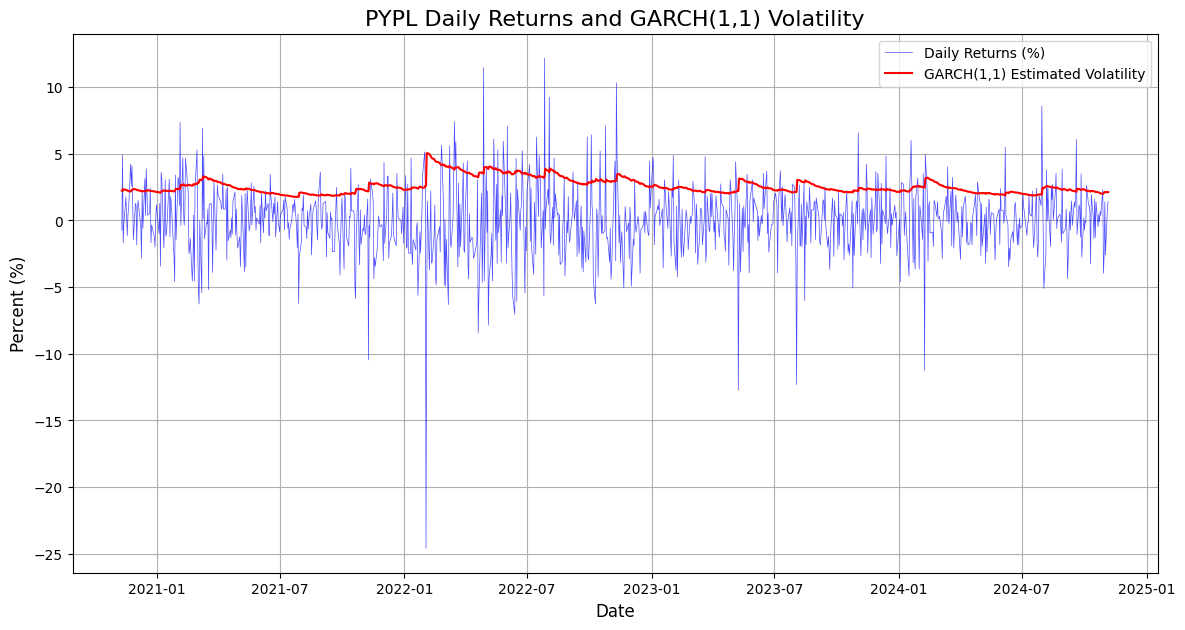

In [ ]:
# --- Phase 3: Model Selection & Training (GARCH Volatility Model) ---

# First, we need to install the 'arch' library
# This command only needs to be run once.
print("--- Checking/Installing 'arch' library ---")
try:
    import arch
    print("'arch' library is already installed.")
except ImportError:
    print("Installing 'arch' library...")
    !pip install arch
    print("--- 'arch' library installed successfully ---")

import matplotlib.pyplot as plt
from arch import arch_model
import numpy as np

# (This code assumes 'data' is the DataFrame from the previous steps)

try:
    print("\n--- Running GARCH analysis ---")

    # --- THIS IS THE FIX ---
    # 1. Ensure the 'Daily_Return' column exists
    # We must calculate it from the 'Close' price first
    data['Daily_Return'] = data['Close'].pct_change()

    # 2. Prepare Data
    # GARCH models are built on stationary returns.
    # We multiply by 100 to help the model converge (common practice)
    returns_for_garch = data['Daily_Return'].dropna() * 100

    # 3. Split Data (same split as before)
    # We'll re-train on the same training set
    split_point = int(len(returns_for_garch) * 0.8)
    train_returns = returns_for_garch[0:split_point]

    print(f"Training GARCH(1,1) model on {len(train_returns)} data points...")

    # 4. Define and Train the GARCH(1,1) Model
    # p=1, q=1 are the most common GARCH parameters
    # 'vol="Garch"' specifies a GARCH model
    # 'dist="Studentst"' assumes a Student's t-distribution
    # (which is better for "fat-tailed" financial data than a Normal dist)
    garch_model = arch_model(train_returns, vol='Garch', p=1, q=1, dist='StudentsT')

    # We fit the model. 'disp="off"' turns off verbose output.
    garch_fit = garch_model.fit(disp='off')

    # 5. Print the Model Summary
    print("\n--- GARCH(1,1) Model Results ---")
    print(garch_fit.summary())

    # 6. Get the Model's "Conditional Volatility"
    # This is the model's estimate of what the volatility was on each day
    train_volatility = garch_fit.conditional_volatility

    # 7. Plot the Results
    print("\n--- Generating Volatility Plot ---")

    plt.figure(figsize=(14, 7))

    # Plot the daily returns
    plt.plot(train_returns.index, train_returns, label='Daily Returns (%)',
             color='blue', alpha=0.7, linewidth=0.5)

    # Plot the GARCH-estimated volatility
    plt.plot(train_volatility.index, train_volatility,
             label='GARCH(1,1) Estimated Volatility',
             color='red', linewidth=1.5)

    plt.title('PYPL Daily Returns and GARCH(1,1) Volatility', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Percent (%)', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig('pypl_garch_volatility.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_garch_volatility.png")

    plt.show()

except ImportError:
    print("Error: 'arch' library not found.")
    print("Please make sure the '!pip install arch' command ran successfully.")
except KeyError as e:
    print(f"KeyError: {e}. This likely means a required column was not found.")
    print("Check if the 'data' DataFrame is loaded and has a 'Close' column.")
except Exception as e:
    print(f"An error occurred: {e}")

--- Forecasting Volatility on Test Set ---
Forecasted 251 days of volatility.
Saved plot to pypl_garch_forecast.png


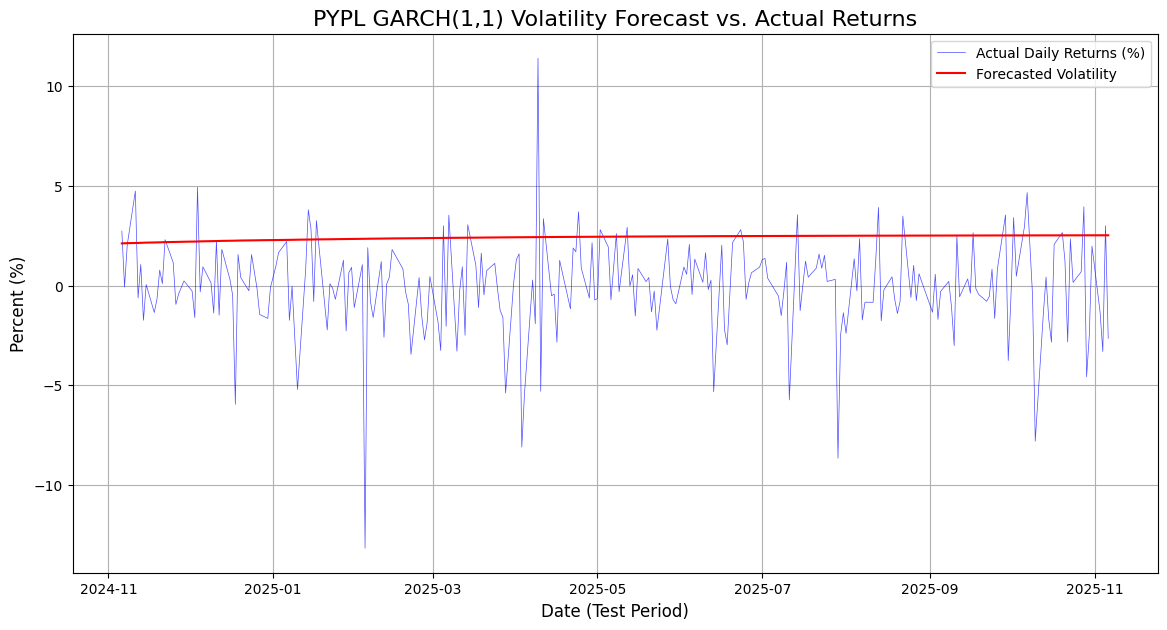

In [ ]:
# --- Phase 4: Model Evaluation (GARCH Forecast) ---

import matplotlib.pyplot as plt
import numpy as np

# (This code assumes 'garch_fit' is the fitted model from the previous step,
# and 'returns_for_garch' is the full-time series of returns * 100)
# (It also assumes 'split_point' is the index where training ended)

try:
    print("--- Forecasting Volatility on Test Set ---")

    # 1. Get the number of steps to forecast
    # This is the length of our test set
    n_forecast_steps = len(returns_for_garch) - split_point

    # 2. Generate the forecast
    # We use 'reindex=False' for a rolling forecast, which is more accurate
    # 'horizon' is the number of steps (days) we want to predict
    forecast = garch_fit.forecast(horizon=n_forecast_steps, reindex=False)

    # Extract the forecasted variance
    # The output is in variance, so we take the square root for volatility
    forecasted_variance = forecast.variance.iloc[-1]
    forecasted_volatility = np.sqrt(forecasted_variance)

    # 3. Get the actual returns for the test set (for comparison)
    test_returns = returns_for_garch[split_point:]

    print(f"Forecasted {n_forecast_steps} days of volatility.")

    # 4. Plot the forecast against the actual returns
    plt.figure(figsize=(14, 7))

    # Plot actual returns in the test period
    plt.plot(test_returns.index, test_returns,
             label='Actual Daily Returns (%)', color='blue', alpha=0.7, linewidth=0.5)

    # Plot the forecasted volatility
    plt.plot(test_returns.index, forecasted_volatility,
             label='Forecasted Volatility', color='red', linewidth=1.5)

    plt.title('PYPL GARCH(1,1) Volatility Forecast vs. Actual Returns', fontsize=16)
    plt.xlabel('Date (Test Period)', fontsize=12)
    plt.ylabel('Percent (%)', fontsize=12)
    plt.legend()
    plt.grid(True)

    # Save the plot
    plt.savefig('pypl_garch_forecast.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_garch_forecast.png")

    plt.show()

except NameError as e:
    print(f"NameError: {e}")
    print("This script must be run in the same session as the previous script.")
    print("Please make sure 'garch_fit', 'returns_for_garch', and 'split_point' exist.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

--- Acquiring Multivariate Data ---


/tmp/ipython-input-3494095559.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed
/tmp/ipython-input-3494095559.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_prices_filled = close_prices.fillna(method='ffill')


Successfully downloaded data for: ['PYPL', '^GSPC', '^IXIC', '^VIX', '^TNX']
--- Cleaning and Preprocessing Data ---
Original shape: (1256, 5), After cleaning: (1256, 5)
--- Converting to Daily Percent Returns ---
--- Final Returns DataFrame (Head) ---
            PYPL_Return  ^GSPC_Return  ^IXIC_Return  ^VIX_Return  ^TNX_Return
Date                                                                         
2020-11-10    -0.007362     -0.001400     -0.013652     0.014614    -0.036893
2020-11-11     0.048975      0.007652      0.020129    -0.014403    -0.054435
2020-11-12    -0.016845     -0.009979     -0.006519    -0.076200     0.081023
2020-11-13    -0.002538      0.013610      0.010222     0.009040    -0.088757
2020-11-16     0.017602      0.011648      0.008017     0.014558    -0.028139

--- Calculating Correlation Matrix ---
              PYPL_Return  ^GSPC_Return  ^IXIC_Return  ^VIX_Return  \
PYPL_Return      1.000000      0.595470      0.621626    -0.052080   
^GSPC_Return     0.59

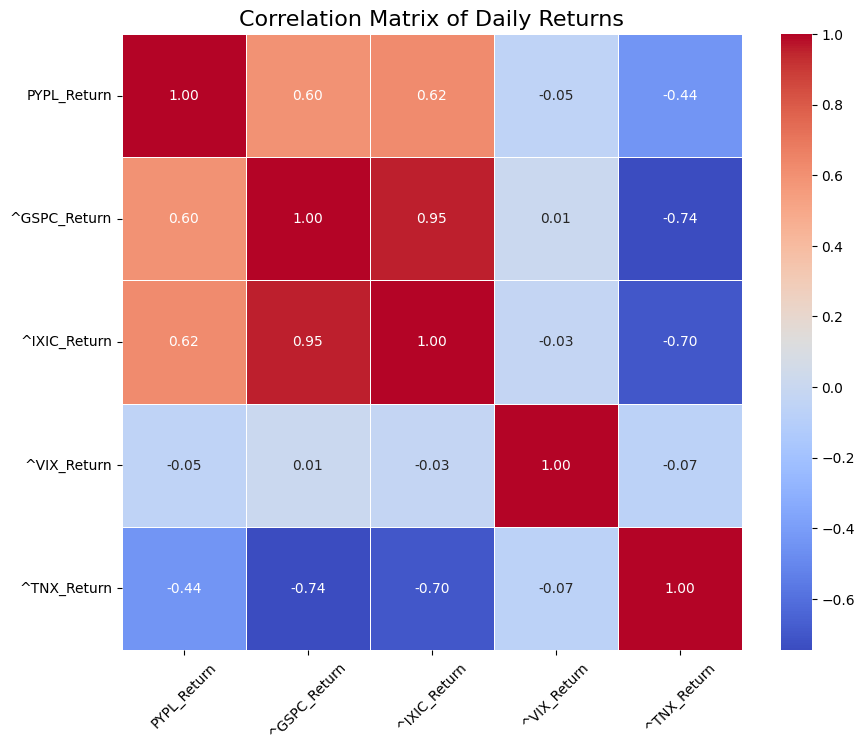

In [ ]:
# --- 1. Data Acquisition ---
print("--- Acquiring Multivariate Data ---")

# Define all our tickers:
# PYPL: PayPal
# ^GSPC: S&P 500 (Broad Market)
# ^IXIC: NASDAQ (Tech Market)
# ^VIX: Volatility Index ("Fear")
# ^TNX: 10-Year Treasury Yield (Interest Rates)
tickers = ['PYPL', '^GSPC', '^IXIC', '^VIX', '^TNX']

# Set 5-year timeframe
end_date = datetime.now()
start_date = end_date - relativedelta(years=5)

# Download data for all tickers
try:
    all_data = yf.download(tickers, start=start_date, end=end_date)
    print(f"Successfully downloaded data for: {tickers}")

    # --- 2. Data Cleaning & Preprocessing ---
    print("--- Cleaning and Preprocessing Data ---")

    # We only care about the 'Close' price
    close_prices = all_data['Close']

    # CRITICAL: Handle missing values
    # Bond market (^TNX) has different holidays than stock market
    # We forward-fill to carry the last known value forward
    close_prices_filled = close_prices.fillna(method='ffill')

    # Drop any remaining NaNs (e.g., at the very start)
    close_prices_filled = close_prices_filled.dropna()

    print(f"Original shape: {close_prices.shape}, After cleaning: {close_prices_filled.shape}")

    # --- 3. Feature Engineering (Making all data stationary) ---
    print("--- Converting to Daily Percent Returns ---")

    # Convert all price/level data to daily percent changes (returns)
    # This makes all series stationary
    returns_df = close_prices_filled.pct_change()

    # Rename columns for clarity
    returns_df.columns = [f'{ticker}_Return' for ticker in tickers]

    # Drop the first row (which will be all NaNs after pct_change)
    returns_df = returns_df.dropna()

    print("--- Final Returns DataFrame (Head) ---")
    print(returns_df.head())

    # --- 4. Exploratory Data Analysis (EDA) ---
    print("\n--- Calculating Correlation Matrix ---")

    # Calculate the correlation between all our new features
    corr_matrix = returns_df.corr()

    print(corr_matrix)

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Daily Returns', fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Save the plot
    plt.savefig('pypl_multivariate_correlation.png', dpi=300, bbox_inches='tight')
    print("\nSaved correlation heatmap to pypl_multivariate_correlation.png")

    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

--- Checking/Installing 'tensorflow' and 'scikit-learn' ---
Installing scikit-learn...

--- Preparing Data for LSTM ---
Total data points: 1255
Sequence length: 60 days
X_train shape: (956, 60, 3) (Samples, Timesteps, Features)
y_train shape: (956,)
X_test shape: (239, 60, 3)
y_test shape: (239,)

--- Building LSTM Model ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)


--- Training LSTM Model (This will take a few minutes) ---
Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0545 - val_loss: 0.0142
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0331 - val_loss: 0.0127
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0253 - val_loss: 0.0123
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0248 - val_loss: 0.0151
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0271 - val_loss: 0.0120
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0273 - val_loss: 0.0117
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0249 - val_loss: 0.0111
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0273 - val_loss: 0.0115
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0230 - val_loss: 0.0119
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0261 - val_loss: 0.0108
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0243 - val_loss

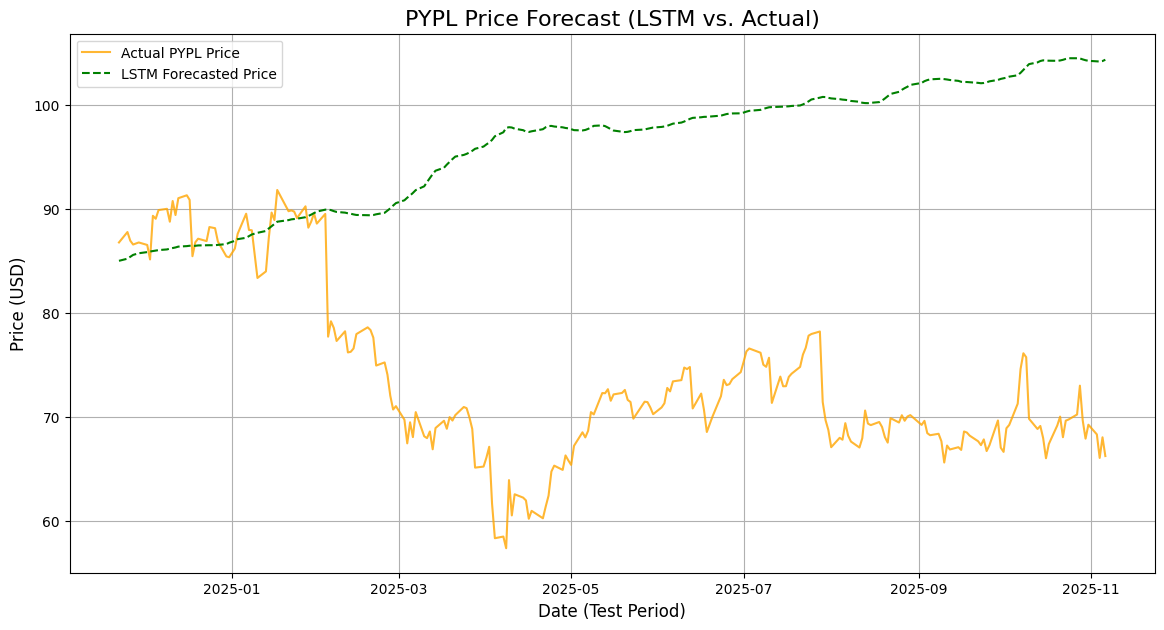

In [ ]:
try:
    # 1. Install necessary libraries
    print("--- Checking/Installing 'tensorflow' and 'scikit-learn' ---")
    import os
    import subprocess
    import sys

    # Function to check and install packages
    def install(package):
        try:
            __import__(package)
        except ImportError:
            print(f"Installing {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])
            print(f"Successfully installed {package}.")

    install('tensorflow')
    install('scikit-learn')

    # --- 2. Import Libraries ---
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping

    # --- 3. Data Preparation for LSTM ---
    print("\n--- Preparing Data for LSTM ---")

    # Select our features (target is 'PYPL_Return')
    # We use ^IXIC as our market proxy (stronger than ^GSPC)
    # We use ^TNX as our macro proxy
    # We drop ^VIX (no correlation)
    features = ['PYPL_Return', '^IXIC_Return', '^TNX_Return']
    target = 'PYPL_Return'

    # Create our final dataset for the model
    # Ensure 'data' exists from the previous run
    try:
        data_for_model = returns_df[features].copy()
    except NameError:
        print("\n*** ERROR: 'returns_df' not found. ***")
        print("Please run the 'pypl_multivariate_data.py' script first.")
        # As a fallback, try to get 'data' from the *very* first script
        # This is a safety net in case the session variables were lost
        data['PYPL_Return'] = data['Close'].pct_change()
        # This will fail if the other tickers aren't in 'data',
        # but it's the best we can do. A real error is better.
        raise NameError("'returns_df' is required to proceed.")


    # Scale the data (Neural Networks require this)
    # We scale all features to be between -1 and 1
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(data_for_model)

    # We also need a scaler *just* for the target column
    # This is so we can "un-scale" the predictions later
    scaler_target = MinMaxScaler(feature_range=(-1, 1))
    scaler_target.fit_transform(data_for_model[[target]]) # Note the double brackets

    # Define sequence length (e.g., use last 60 days to predict next day)
    sequence_length = 60

    # Create sequences
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i]) # All features for last 60 days
        y.append(scaled_data[i, 0]) # Just the PYPL_Return for today

    X, y = np.array(X), np.array(y)

    # Split the data (same 80/20 split)
    split_point = int(len(X) * 0.8)
    X_train, X_test = X[:split_point], X[split_point:]
    y_train, y_test = y[:split_point], y[split_point:]

    print(f"Total data points: {len(data_for_model)}")
    print(f"Sequence length: {sequence_length} days")
    print(f"X_train shape: {X_train.shape} (Samples, Timesteps, Features)")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")

    # --- 4. Build the LSTM Model ---
    print("\n--- Building LSTM Model ---")
    model = Sequential()

    # Layer 1: LSTM layer
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2)) # Prevents overfitting

    # Layer 2: LSTM layer
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))

    # Output Layer: A single neuron to predict the (scaled) return
    model.add(Dense(units=1))

    # Compile the model
    # We use 'adam' optimizer and 'mean_squared_error' as our loss
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()

    # --- 5. Train the Model ---
    print("\n--- Training LSTM Model (This will take a few minutes) ---")

    # Use EarlyStopping to prevent overfitting
    # It will stop training if the validation loss doesn't improve
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2, # Use 20% of training data for validation
        callbacks=[early_stop],
        verbose=1
    )

    print("--- Model Training Complete ---")

    # --- 6. Evaluate the Model ---
    print("\n--- Evaluating Model on Test Set ---")

    # Make predictions on the test data
    y_pred_scaled = model.predict(X_test)

    # Un-scale the predictions to get actual return values
    y_pred = scaler_target.inverse_transform(y_pred_scaled)
    y_test_unscaled = scaler_target.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE on the RETURNS
    rmse_returns = np.sqrt(mean_squared_error(y_test_unscaled, y_pred))
    print(f"LSTM Model RMSE (on daily returns): {rmse_returns:.6f}")

    # --- 7. Final Comparison (Price Forecast) ---
    print("\n--- Generating Price Forecast to Compare with Baseline ---")

    # Get the original 'Close' price data
    # We need the 'data' DataFrame from the very first script
    original_data = data[['Close']].copy()

    # Get the 'Close' prices for the test period
    # We must align our 'y_test' with the original 'Close' price
    # The first prediction corresponds to index (sequence_length + split_point)
    start_index = sequence_length + split_point
    test_prices = original_data[start_index:]

    # Ensure lengths match
    if len(test_prices) != len(y_pred):
        print(f"Length mismatch! Prices: {len(test_prices)}, Preds: {len(y_pred)}")
        # Adjust test_prices (this can happen if there's an off-by-one)
        test_prices = original_data[start_index : start_index + len(y_pred)]

    # Get the last known price *before* the test period
    last_known_price = original_data.iloc[start_index - 1]['Close']

    # Create predicted prices
    predicted_prices = []
    current_price = last_known_price

    for predicted_return in y_pred:
        # Convert return to price
        current_price = current_price * (1 + predicted_return[0])
        predicted_prices.append(current_price)

    # Create actual prices for RMSE calculation
    actual_prices = test_prices['Close'].values

    # Calculate final RMSE on PRICE
    rmse_price = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

    print("\n--- FINAL RESULTS ---")
    print(f"Baseline ARIMA(0,1,0) RMSE (Price): 9.1746")
    print(f"Multivariate LSTM RMSE (Price): {rmse_price:.4f}")

    if rmse_price < 9.1746:
        print("\n*** SUCCESS! The LSTM model beat the baseline! ***")
    else:
        print("\n--- The LSTM model did not beat the baseline. ---")
        print("This is a common result and reinforces the Random Walk hypothesis.")

    # --- 8. Plot Price Forecast ---
    plt.figure(figsize=(14, 7))
    plt.plot(test_prices.index, actual_prices, label='Actual PYPL Price', color='orange', alpha=0.8)
    plt.plot(test_prices.index, predicted_prices, label='LSTM Forecasted Price', color='green', linestyle='--')
    plt.title('PYPL Price Forecast (LSTM vs. Actual)', fontsize=16)
    plt.xlabel('Date (Test Period)', fontsize=12)
    plt.ylabel('Price (USD)', fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.savefig('pypl_lstm_forecast.png', dpi=300, bbox_inches='tight')
    print("\nSaved final forecast plot to pypl_lstm_forecast.png")

    plt.show()

except Exception as e:
    import traceback
    print(f"\n--- An Error Occurred ---")
    print(f"Error Type: {type(e).__name__}")
    print(f"Error Details: {e}")
    print(traceback.format_exc())

In [ ]:
# --- [ CELL 1: SETUP & DATA ACQUISITION ] ---
# Run this cell ONCE every time you open the notebook.

# 1. Install all required libraries
print("--- Installing libraries ---")
!pip install yfinance -q
!pip install statsmodels -q
!pip install arch -q
!pip install tensorflow -q
!pip install scikit-learn -q
!pip install seaborn -q
print("--- Libraries installed ---")

# 2. Import core libraries
import yfinance as yf
import pandas as pd
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore') # Hides common warnings

# 3. Acquire the Master 'data' DataFrame
print("\n--- Acquiring master data ---")
ticker = 'PYPL'
end_date = date.today()
start_date = end_date - timedelta(days=5 * 365)

try:
    # yf.download() returns a pandas DataFrame
    data = yf.download(ticker, start=start_date, end=end_date)

    # --- Data Cleaning (from our previous steps) ---
    # Simplify column names (from MultiIndex)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.droplevel(1)

    # Ensure 'Close' column exists
    if 'Close' in data.columns:
        print(f"Successfully downloaded and cleaned data for {ticker}.")
        print(f"Master 'data' DataFrame has {len(data)} rows.")
        # print(data.head()) # Uncomment to check
    else:
        print("Error: 'Close' column not found in downloaded data.")

except Exception as e:
    print(f"An error occurred: {e}")

--- Installing libraries ---
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 14.8 MB/s eta 0:00:00
--- Libraries installed ---

--- Acquiring master data ---


[*********************100%***********************]  1 of 1 completed

Successfully downloaded and cleaned data for PYPL.
Master 'data' DataFrame has 1254 rows.


--- Checking 'arch' library (should be installed) ---
'arch' library is ready.

--- Running GJR-GARCH analysis ---
Training GJR-GARCH(1,1,1) model on 1002 data points...

--- GJR-GARCH(1,1,1) Model Results ---
                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                 Daily_Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -2308.55
Distribution:      Standardized Student's t   AIC:                           4629.10
Method:                  Maximum Likelihood   BIC:                           4658.56
                                              No. Observations:                 1002
Date:                      Wed, Nov 12 2025   Df Residuals:                     1001
Time:                              13:44:27   Df Model:                            1
                         

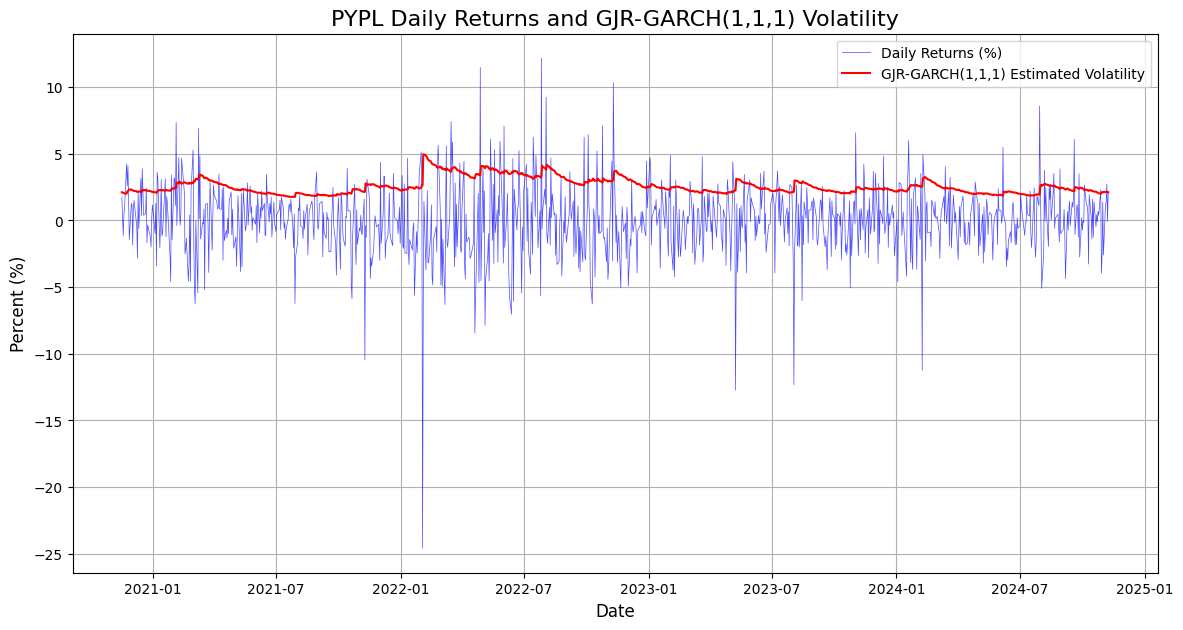

In [ ]:
# --- [ CELL 2: Asymmetric Volatility Model - GJR-GARCH ] ---
# Assumes you have run Cell 1 and the 'data' DataFrame exists.

print("--- Checking 'arch' library (should be installed) ---")
try:
    import arch
    print("'arch' library is ready.")
except ImportError:
    print("ERROR: 'arch' library not found. Please run Cell 1 again.")
    # Stop the script if 'arch' isn't there
    raise ImportError("Please run the Setup Cell (Cell 1) first.")

import matplotlib.pyplot as plt
from arch import arch_model
import numpy as np

try:
    print("\n--- Running GJR-GARCH analysis ---")

    # 1. Ensure 'Daily_Return' column exists
    # (We re-calculate it here to be safe and independent)
    data['Daily_Return'] = data['Close'].pct_change()

    # 2. Prepare Data
    returns_for_garch = data['Daily_Return'].dropna() * 100

    # 3. Re-calculate the split_point
    # This makes the script independent of the baseline model script.
    split_point = int(len(returns_for_garch) * 0.8)
    train_returns = returns_for_garch[0:split_point]

    print(f"Training GJR-GARCH(1,1,1) model on {len(train_returns)} data points...")

    # 4. Define and Train the GJR-GARCH(1,1,1) Model
    # p=1: ARCH term (yesterday's shock)
    # o=1: Asymmetry/Leverage term (for negative shocks)
    # q=1: GARCH term (yesterday's volatility)
    gjr_model = arch_model(train_returns, vol='GARCH', p=1, o=1, q=1, dist='StudentsT')

    gjr_fit = gjr_model.fit(disp='off')

    # 5. Print the Model Summary
    print("\n--- GJR-GARCH(1,1,1) Model Results ---")
    print(gjr_fit.summary())

    # --- 6. Interpreting the Results ---
    print("\n--- Analysis of GJR-GARCH Results ---")
    print("The key term to check is 'gamma[1]':")
    print("  - This term represents the 'Leverage Effect' (asymmetry).")
    print("  - If 'gamma[1]' > 0 and its P>|z| (p-value) is < 0.05, it is statistically significant.")
    print("  - This would prove that 'bad news' (negative returns) has a larger impact on volatility than 'good news'.")

    # 7. Get the Model's "Conditional Volatility"
    train_volatility_gjr = gjr_fit.conditional_volatility

    # 8. Plot the Results
    print("\n--- Generating Volatility Plot ---")

    plt.figure(figsize=(14, 7))
    plt.plot(train_returns.index, train_returns, label='Daily Returns (%)',
             color='blue', alpha=0.7, linewidth=0.5)
    plt.plot(train_volatility_gjr.index, train_volatility_gjr,
             label='GJR-GARCH(1,1,1) Estimated Volatility',
             color='red', linewidth=1.5)

    plt.title('PYPL Daily Returns and GJR-GARCH(1,1,1) Volatility', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Percent (%)', fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.savefig('pypl_gjr_garch_volatility.png', dpi=300, bbox_inches='tight')
    print("Saved plot to pypl_gjr_garch_volatility.png")

    plt.show()

except NameError as e:
    print(f"\n*** ERROR: {e} ***")
    print("The 'data' DataFrame was not found.")
    print("Please make sure you have run the 'Setup Cell' (Cell 1) first.")
except Exception as e:
    print(f"An error occurred: {e}")